<a href="https://colab.research.google.com/github/sukhadadh/Machine-Learning-Projects/blob/main/linear%2Classo_and_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib import style
from sklearn.linear_model import LinearRegression,Lasso,LassoCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import missingno as msno
from sklearn.model_selection import cross_val_score
print("libraries imported...")

libraries imported...


In [ ]:
df = pd.read_csv("HousingData.csv")
print("dataset loaded...")

dataset loaded...


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


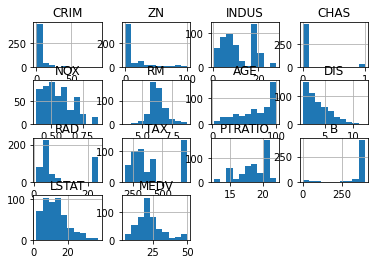

In [ ]:
df.hist()
plt.show()

In [ ]:
x = df[['LSTAT','RM','NOX','PTRATIO','DIS','AGE']]
y= df['MEDV']
print("dependent and independent variables are selected...")

dependent and independent variables are selected...


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.40)
print("training and spilting of dataset is done...")

training and spilting of dataset is done...


# fitting Linear Regression model*

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [ ]:
print("accuracy of train set using linear regresssion",lr.score(x_train,y_train))
print("accuracy of test set using linear regression",lr.score(x_test,y_test))

accuracy of train set using linear regresssion 0.6770055557728829
accuracy of test set using linear regression 0.7257872725096166


In [ ]:
slop1 = lr.coef_
intercept1 = lr.intercept_
print("slop of linear regression",slop1)
print("intercept of linear regression",intercept1)

slop of linear regression [-6.06713926e-01  3.78802414e+00 -1.53739108e+01 -1.07313464e+00
 -1.20798004e+00 -1.01599404e-02]
intercept of linear regression 40.16531552856235


In [ ]:
mse = cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=10)
mse

array([  -9.83034214,  -14.72692447,  -12.41462996,  -35.07284328,
        -26.8471154 ,  -21.35094748,  -13.69356085, -152.0173662 ,
        -37.59357283,   -9.62151216])

In [ ]:
mean_mse = np.mean(mse)
mean_mse

-33.31688147618245

In [ ]:
r2_score1 = r2_score(y_pred,y_test)
r2_score1

0.5986694224219347

# fitting Lasso regression model

In [ ]:
ls = Lasso()
ls.fit(x_train,y_train)
y_pre = ls.predict(x_test)


In [ ]:
print("accuracy of train set using lasso regresssion",ls.score(x_train,y_train))
print("accuracy of test set using lasso regression",ls.score(x_test,y_test))

accuracy of train set using lasso regresssion 0.5962478814564538
accuracy of test set using lasso regression 0.6707878771234378


In [ ]:
print("slop of lasso regression",ls.coef_)
print("intercept of lasso regression",ls.intercept_)

slop of lasso regression [-0.81924386  1.2601164  -0.         -0.74029796 -0.21197011 -0.00540438]
intercept of lasso regression 39.81987669664704


In [ ]:
#cross validation of lasso model
lasso_cv = LassoCV(cv=10)
lasso_cv.fit(x, y)
lasso_cv.score(x,y)

0.6791813946166887

In [ ]:
mse1 = cross_val_score(ls,x,y,scoring='neg_mean_squared_error',cv=10)
mse1

array([ -13.13430267,  -13.86278877,  -12.98763925,  -60.08095176,
        -51.36627046,  -49.3351537 ,  -21.07457304, -103.03618274,
        -32.39231125,  -10.35117421])

In [ ]:
mean_mse1 = np.mean(mse1)
mean_mse1

-36.76213478562648

In [ ]:
r2_score2 = r2_score(y_pre,y_test)
r2_score2

0.49715286263651803

# fitting model using Ridge regression

In [ ]:
ri = Ridge()
ri.fit(x_train,y_train)
y_pred1 = ri.predict(x_test)

In [ ]:
print("accuracy of train set using lasso regresssion",ri.score(x_train,y_train))
print("accuracy of test set using lasso regression",ri.score(x_test,y_test))

accuracy of train set using lasso regresssion 0.6545440806513905
accuracy of test set using lasso regression 0.7516747190753671


In [ ]:
print("slop of lasso regression",ri.coef_)
print("intercept of lasso regression",ri.intercept_)

slop of lasso regression [ -0.65970722   3.71873453 -12.58881936  -0.95105773  -1.14513968
  -0.02272582]
intercept of lasso regression 37.924243192167076


In [ ]:
mse2 = cross_val_score(ri,x,y,scoring='neg_mean_squared_error',cv=10)
mse2

array([ -10.30663042,  -12.50157555,  -10.63515459,  -36.64231928,
        -27.67682131,  -21.50120652,  -12.79393774, -148.40951776,
        -40.33688253,   -9.40642777])

In [ ]:
mean_mse2 = np.mean(mse2)
mean_mse2

-33.021047348117875

In [ ]:
r2_score3 = r2_score(y_pred1,y_test)
r2_score3

0.6994692505436106

# after comparing r2 values
# linear regression model is 70.36 % accurate
# lasso regression model is 49.71 % accurate
# ridge regression model is 69.94 % accurate 